<a href="https://colab.research.google.com/github/zhong338/MFM-courses-/blob/main/Week9_LectureSlide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FM 5222
# Week 9


## Agenda

* AR(1)
* Fitting AR(1)
* AR(p)
* Moving Avarage Models (MA)

## AR(1)

Suppose we have a stationary series, but it is not White Noie.  We would seek to model the series. Of of the simplest models is the Autoregressive model with a lag of 1. The model is follows:


$$X_{t} = (1-\phi) \mu + \phi X_{t-1} +  \epsilon_t$$

where

$\phi$ is constant and $\epsilon_t$ is white noise with mean zero. 


Note that is equivalent to (as stated in the text):

$$X_{t} -  \mu =   \phi (X_{t-1} -\mu) +  \epsilon_t$$



What is happening is that each value of $X_i$ is determined via a combination of it's previous value, the mean, and zero-mean white noise. 





We can iterate this formula as follows:


$$X_t =(1-\phi) \mu + \phi X_{t-1} +  \epsilon_t\\
= (1-\phi) \mu + \phi \left((1-\phi) \mu + \phi X_{t-2} +  \epsilon_{t-1}\right) +  \epsilon_t\\
= (1-\phi^2)\mu + \phi^2X_{t-2} + \epsilon_t + \phi \epsilon_{t-1} $$

Continuing on for some $h>1$, 

$$X_t = (1-\phi^h)\mu + \phi^hX_{t-h} + \sum_{k = 0}^{h-1}  \phi^k \epsilon_{t-k} $$


We can then see that:


$$\mathrm{E}(X_t) = (1-\phi^h)\mu  + \phi^h\mathrm{E}(X_{t-h})$$

and that (noting the epsilons are uncorrelated)

$$\mathrm{Var}(X_t) = \phi^h \mathrm{Var}(X_{t-h})  +  \sum_{k = 0}^{h-1}  \phi^{2k} \sigma^2_{\epsilon}$$




If we assume that $|\phi| <1$, the taking the limit as $h \to \infty$ tells us that
$$\mathrm{E}(X_t) = \mu$$


Looking at the variance, taking the limit tells us that 

$$\mathrm{Var}(X_t) = \sigma_{\epsilon}^2 \sum_{k=0}^{\infty} \phi^{2k}\\
= \frac{\sigma_{\epsilon}^2}{1-\phi^2}$$



Next, we observe that (for $h>0$)

$$\mathrm{Cov}(X_t,X_{t-h}) = \mathrm{Cov}\left((1-\phi^h)\mu + \phi^hX_{t-h} + \sum_{k = 0}^{h-1}  \phi^k \epsilon_{t-k} ,X_{t-h}\right) \\
=  \mathrm{Cov}\left((1-\phi^h)\mu,X_{t-h}\right) +  \mathrm{Cov}\left( \phi^hX_{t-h}   ,X_{t-h}\right) +  \sum_{k = 0}^{h-1}\mathrm{Cov}\left(   \phi^k \epsilon_{t-k} ,X_{t-h}\right)\\
= 0 + \phi^h \mathrm{Var}(X_{t-h})+ \sum_{k = 0}^{h-1}0\\
= \phi^h \mathrm{Var}(X_{t-h})\\
= \phi^h \frac{\sigma_{\epsilon}^2}{1-\phi^2}$$


Hence we have that there is an autocorrelationfunction and it is 

$$\rho(h) = \phi^h$$ 


Hence, if |phi| < 1, the AR(1) model is weakly stationary.

#### $|\phi| \geq 1$


If $|\phi| \geq 1$, then the geometric series for the variance diverges, and in particular, the series cannot be stationary.

As mentioned in the text, the most basic example of this would be a random walk $\phi = 1$.  

No matter where the series starts, the variance will just grow over time.

### Convegence to Stationarity

Suppose again that $|\phi| <1$

The above arguments assumed that we can just take $h \to \infty$.  But most series do not have "infinite" history. Suppose for example that there was an initial point $X_0$.  Then $$\mathrm{E}(X_t) = (1-\phi^t)\mu  + \phi^tX_0$$

This will only be $\mu$ if $X_0 = \mu$.  However, as $t$ becomes larger, the influence of $X_0$ become smaller and essentially becomes zero. 


For the variance,


$$\mathrm{Var}(X_t) = \phi^t \mathrm{Var}(X_0)  +  \sum_{k = 0}^{t-1}  \phi^{2k} \sigma^2_{\epsilon}\\
= \phi^t \mathrm{Var}(X_0) +\sigma^2_{\epsilon}\frac{1- (\phi^2)^{t}}{1-\phi^2} $$



And again, the influnce of the first data point goes to zero over time and the varance coverges to the same number.

A similar argument works for covariance and it turns out that an AR(1) process will become stationary over time.  How fast depends on the magnitude of $\phi$.



### Examples


Let construct some AR series and see how things behave.  We will take in all cases $\mu = 0$ and $\sigma^2_{epsilon} = 1$   

We will also take $x_0 = 10$


#### $\phi = .9$


In [1]:
!pip install statsmodels==0.13.2

     |████████████████████████████████| 9.8 MB 1.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
import statsmodels
statsmodels.__version__

'0.13.2'

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd



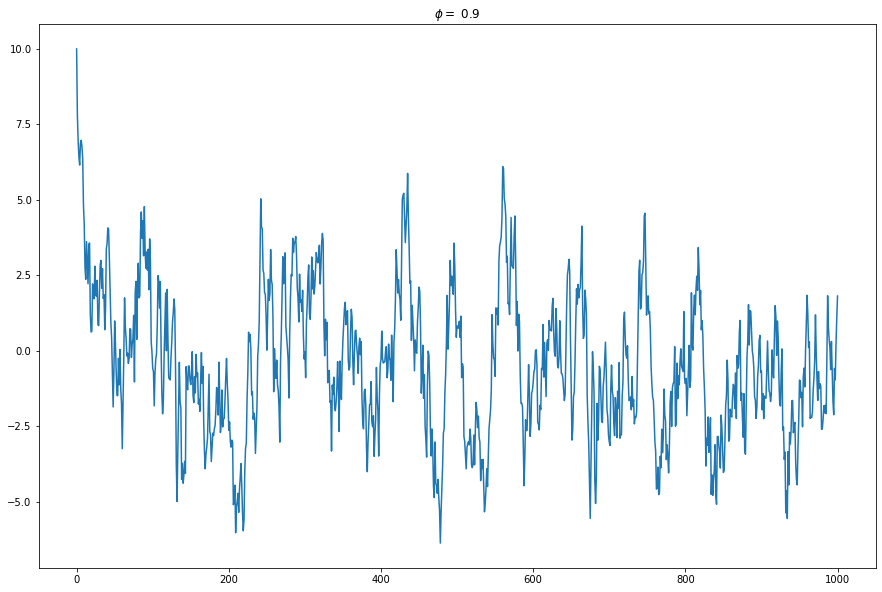

In [4]:


T = 1000
x0 = 10

phi = .9

x = np.ones(T+1)

epsilons = np.random.normal(size = T)

x[0] = x0

for k in range(T):
    x[k+1] = phi* x[k]   +epsilons[k]
    
    

    
plt.figure(figsize = (15,10))


plt.plot(x)

plt.title("$\\phi =$ "+ str(phi))

plt.show()



In [5]:
x.var(axis = 0)

5.784111731123448

#### $\phi = .5$


This should converge to stationary much quicker.

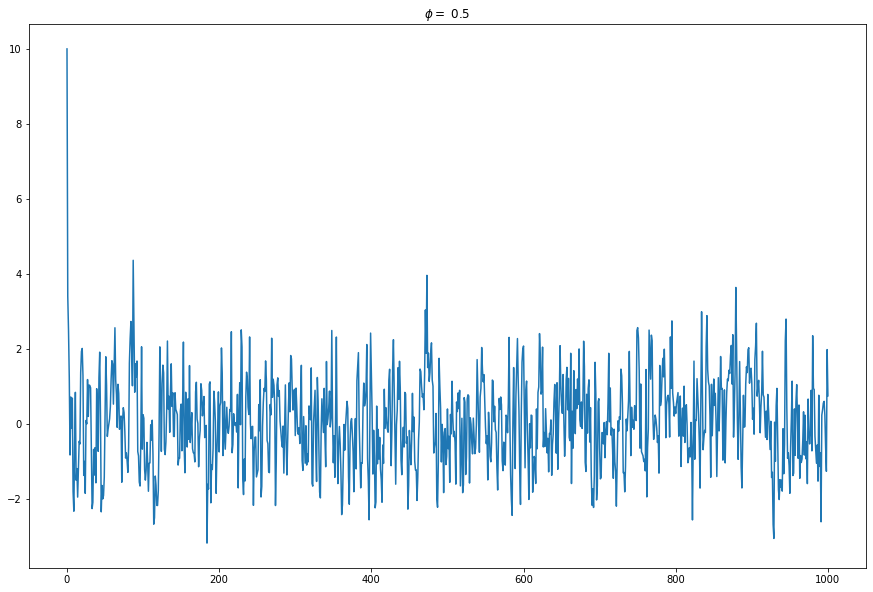

In [6]:
phi = .5

x = np.ones(T+1)

epsilons = np.random.normal(size = T)

x[0] = x0

for k in range(T):
    x[k+1] = phi* x[k]  +epsilons[k]
    
    

    
plt.figure(figsize = (15,10))

plt.plot(x)

plt.title("$\\phi =$ "+ str(phi))

plt.show()

#### $\phi = -.5$

Just to see that sign won't change the fact that it will converge.

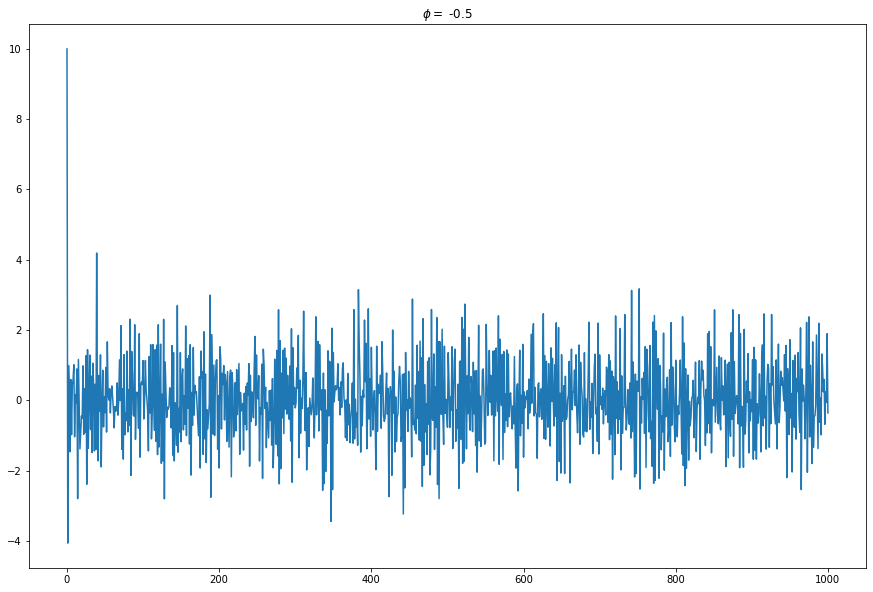

In [7]:
phi = -.5

x = np.ones(T+1)

epsilons = np.random.normal(size = T)

x[0] = x0

for k in range(T):
    x[k+1] = phi* x[k]  +epsilons[k]
    
    

    
plt.figure(figsize = (15,10))

plt.plot(x)

plt.title("$\\phi =$ "+ str(phi))

plt.show()

#### $\phi = 1.1$

This will diverge, as we will now see.

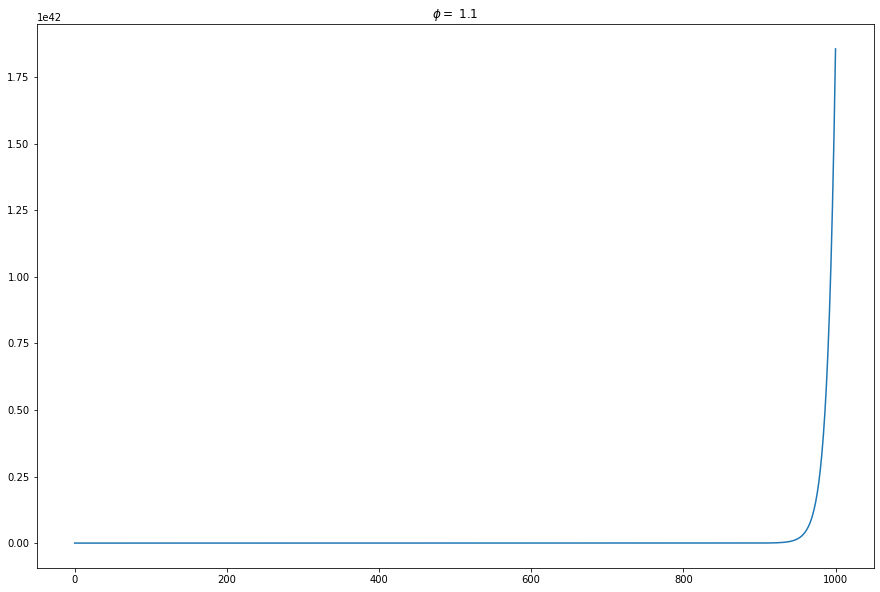

In [8]:
phi = 1.1

x = np.ones(T+1)

epsilons = np.random.normal(size = T)

x[0] = x0

for k in range(T):
    x[k+1] = phi* x[k]  +epsilons[k]
    
    

    
plt.figure(figsize = (15,10))

plt.plot(x)

plt.title("$\\phi =$ "+ str(phi))

plt.show()

#### Variance and autocorrelations
 
 
If our series converges to stationary, we should be able to cut off  the first (say) 100 observations and see if things behave according to theory.  Recall from above that we should have


$$\mathrm{Var}(X_i) =  \frac{\sigma_{\epsilon}^2}{1-\phi^2}$$

and

$$\rho(h) = \phi^h$$


Let see:



In [9]:
phi = .7

x = np.ones(T+1)

epsilons = np.random.normal(size = T)

x[0] = x0

for k in range(T):
    x[k+1] = phi* x[k]  +epsilons[k]
    

    
    
1/(1-phi**2) , x[100:].var()   

(1.9607843137254901, 1.8462368404528107)

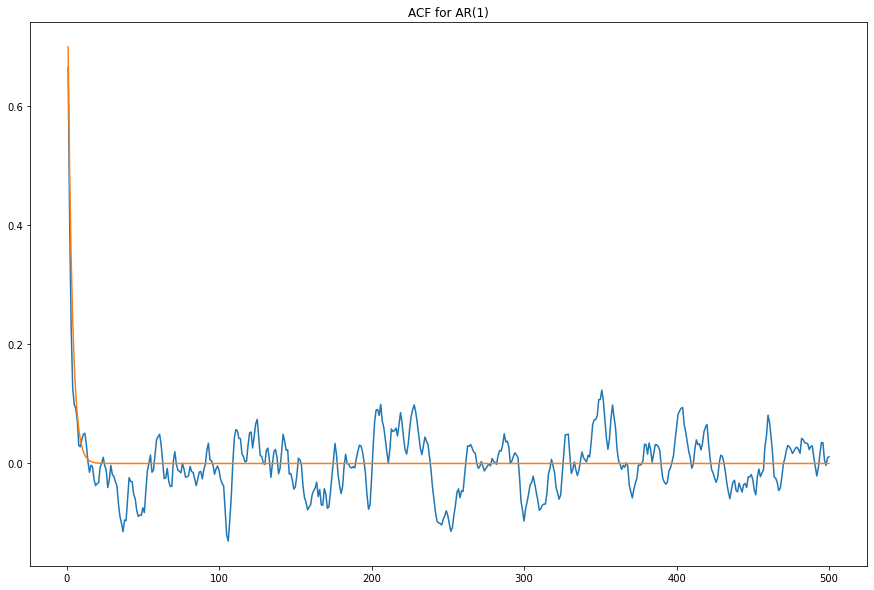

In [10]:
from statsmodels.tsa import stattools

h = np.arange(500)+1



plt.figure(figsize = (15,10))

plt.plot(h,stattools.acf(x[100:], nlags=500)[1:], label = "ACF")

plt.plot(h,phi**h, label = "ACF_theory")

plt.title("ACF for AR(1)")

plt.show()

## Fitting AR(1)

Now let's suppose we had a time series that we suspect might be AR(1).  How would we estimate the parameters?


Let's take an MLE approach.    

Supposse the process for the White Nose $\epsilon$ has pdf $g(x)$.


We know that $X_t = (1-\phi)\mu + \phi X_{t-1} + \epsilon_t$

Hence, the PDF for $X_t$ conditioned on $X_{t-1}$ is the same at that of $\epsilon_t$ but with mean $(1-\phi)\mu + \phi X_{t-1}$.  This means that

$$f_{X_t|X_{t-1}}(x_t; x_{t-1}) = g\left(x_t - \left((1-\phi)\mu + \phi x_{t-1})\right)\right)$$ 



The *joint* PDF for the sequence $(x_0,x_1, x_2, ..., x_t)$ is therefore

$$f_{(X_0,X_1,...X_t)}(x_0,x_1,...x_t) = f_{X_0}(x_0)\times f_{X_1|X_0}(x_1;x_0) \times \cdots \times f_{X_t|X_{t-1}}(x_t; x_{t-1})\\
= f_{X_0}(x_0)\times g\left(x_1 - \left((1-\phi)\mu + \phi x_0)\right)\right) \times \cdots  \times g\left(x_t - \left((1-\phi)\mu + \phi x_{t-1})\right)\right) $$


As per usual, we change the product to a sum and seek to maximize

$$\ln(f_{X_0}(x_0)) + \sum_{k=1}^t \ln\left(  g\left(x_k - \left((1-\phi)\mu + \phi x_{k-1})\right)\right)\right)$$
  


If we know (or assume) the form of $g$, we can minimize the terms in the sum. Since in general, we don't much about the distribution $X_0$, especially how it depends on our parameters, we ignore it.  This is in fact what most softwares will do.  

Furthermore, they assume the White Noise term is Guassian White noise.  This makes the estimation relatively straight forward.


If however, we assume not only Guassian White noise, but that the series waas already stationary at $X_0$, then it follows that $X_0$ is normally distributed with a mean of $\mu$ and a variance of $\frac{\sigma_{\epsilon}^2}{1-\phi^2}$.  Then we can include this term in the sum above and optimize that.

In practice, it typically makes almost no difference.






### Linear Regression

If you are astute, you will regognize that in the case that we take $x_0$ are given (not assuming already stationary) and that the noise Guassian, then the MLE problem will be least-square regression pretty much the same as linear regression.

Indeed, we can think of the model $$X_t = (1-\phi)\mu + \phi X_{t-1} + \epsilon_t$$

just like a linear model where

* The vector $x = (x_0,x_1,x_2, ..., x_{T-1})^T$ is the feature
* The vector $y= (x_1,x_2, ..., x_T)^T$, is response
* (1-\phi)\mu is the intercept
* $\phi$ is the regression coefficient.

We could make the "data matrix"

$$X = \begin{bmatrix}  1 & x_0 \\1 & x_1\\ \vdots  & \vdots \\ 1 & x_{T-1} \\ \end{bmatrix}$$

And regress just like we did before.  In fact, let's make some fake AR(1) data and fit the parameters this way

In [11]:
T = 1000
phi = .5
sigma= .2
mu = 10

x0 = 7

x= np.zeros(T+1)

x[0] = x0

epsilons = np.random.normal(size = T, scale = sigma)


for k in range(T):
    x[k+1] = (1-phi)*mu + phi* x[k] + epsilons[k]
    

X = np.ones([T,2])

X[:,1] = x[:-1]
y = x[1:]


bhat = np.linalg.pinv(X)@y

print("phi hat is", bhat[1])
print("mu hat is ", bhat[0]/(1- bhat[1]))

print("bhat is ", bhat)



phi hat is 0.5147061762237505
mu hat is  9.979578095390119
bhat is  [4.84302761 0.51470618]


Naturally, there are packages tailored to AR that will do this for us (and give us diagnostics)

In [12]:
from statsmodels.tsa.ar_model import AutoReg

mod = AutoReg(x , 1)
res = mod.fit()
print(res.summary())



                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 1001
Model:                     AutoReg(1)   Log Likelihood                 183.992
Method:               Conditional MLE   S.D. of innovations              0.201
Date:                Fri, 25 Mar 2022   AIC                           -361.984
Time:                        05:25:06   BIC                           -347.261
Sample:                             1   HQIC                          -356.388
                                 1001                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8430      0.245     19.763      0.000       4.363       5.323
y.L1           0.5147      0.025     20.955      0.000       0.467       0.563
                                    Roots           

Better yet, this will also give us some nice diagnostics

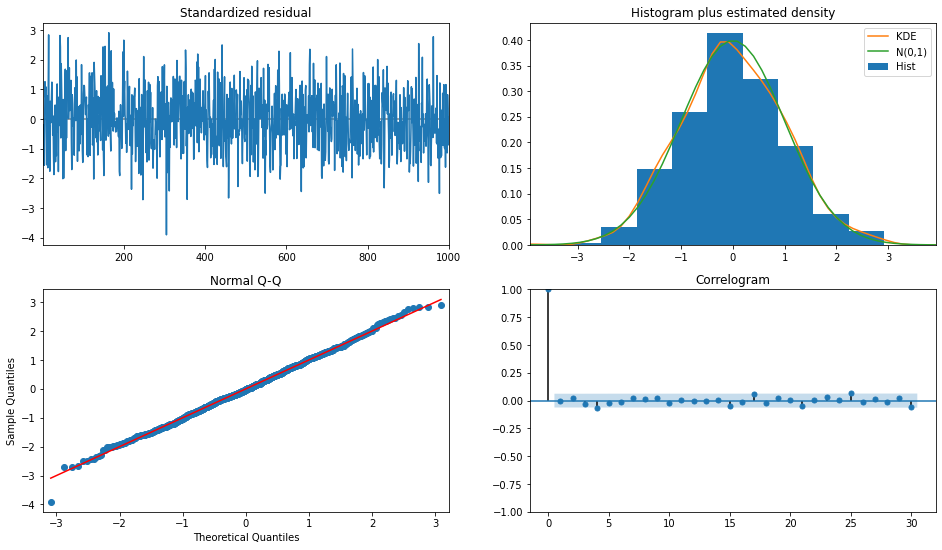

In [13]:
fig = plt.figure(figsize=(16, 9))
fig = res.plot_diagnostics(fig=fig, lags=30)

### Some examples

Let's grab some time series and attempt to AR(1) fit them.  



In [14]:
import pandas_datareader.data as dr

edata = CPI = dr.DataReader(['WM2NS','UNRATE','CPIAUCSL','GDPC1'], 'fred', "2010-01-01", "2019-12-31")

Let fit the change in unemployment rate to an AR(1)

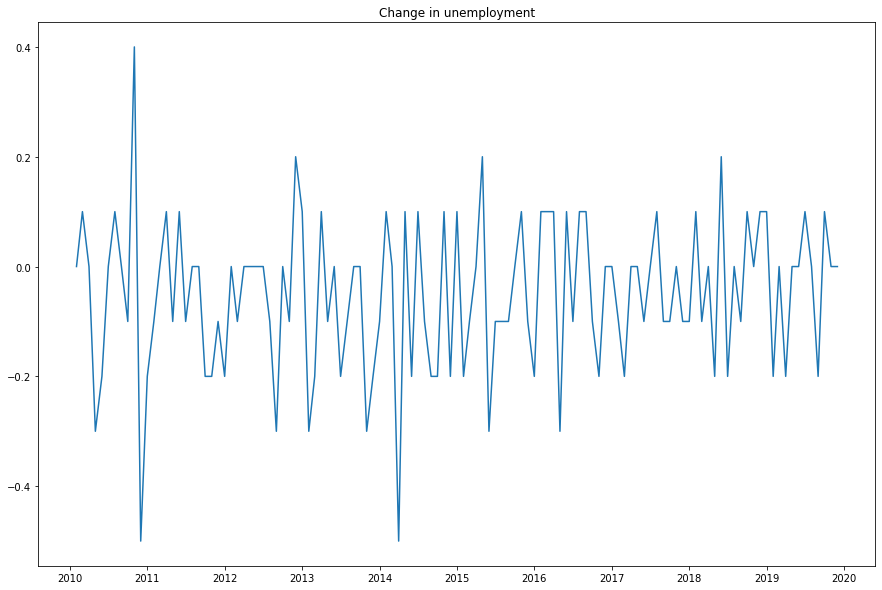

In [15]:
unemp = (edata.UNRATE).dropna()

unempchange = unemp.diff().dropna()


plt.figure(figsize= (15,10))

plt.plot(unempchange)

plt.title("Change in unemployment")


plt.show()

In [16]:
mod = AutoReg(unempchange , 1)
res = mod.fit()
print(res.summary())


                            AutoReg Model Results                             
Dep. Variable:                 UNRATE   No. Observations:                  119
Model:                     AutoReg(1)   Log Likelihood                  66.086
Method:               Conditional MLE   S.D. of innovations              0.138
Date:                Fri, 25 Mar 2022   AIC                           -126.172
Time:                        05:25:09   BIC                           -117.860
Sample:                    03-01-2010   HQIC                          -122.797
                         - 12-01-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0634      0.014     -4.669      0.000      -0.090      -0.037
UNRATE.L1     -0.2063      0.090     -2.291      0.022      -0.383      -0.030
                                    Roots           

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Conveniently, we can also get some quick diagnostics

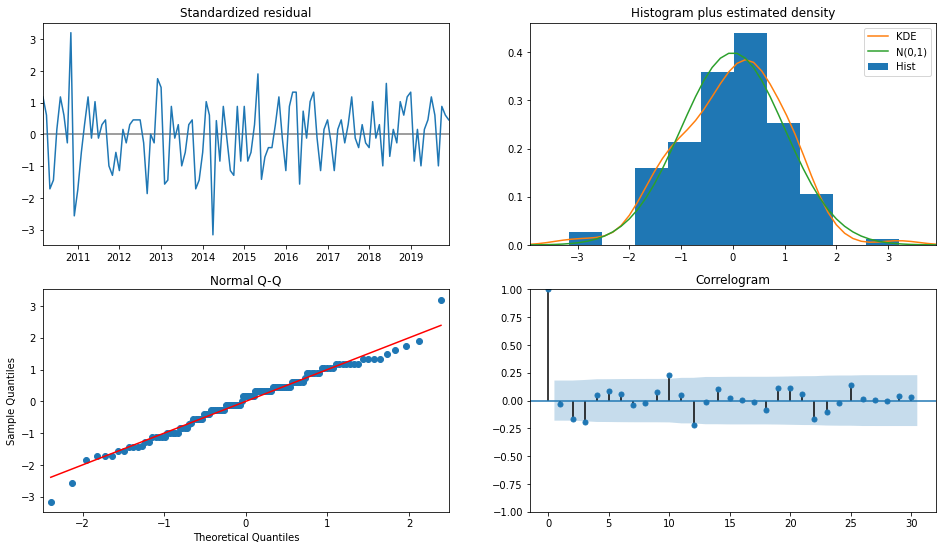

In [17]:
fig = plt.figure(figsize=(16, 9))
fig = res.plot_diagnostics(fig=fig, lags=30)



In [18]:
from statsmodels.stats.diagnostic import acorr_ljungbox as lbox

In [19]:
lbox(res.resid)

,lb_stat,lb_pvalue
1,0.101389,0.750169
2,3.495043,0.174205
3,8.220305,0.041671
4,8.561495,0.073045
5,9.503788,0.090580
6,10.019125,0.123849
7,10.217261,0.176592
8,10.298532,0.244695
9,11.083941,0.269999
10,18.112836,0.053090


Not bad!

Now let's try inflation

In [20]:
cpi = edata.CPIAUCSL.dropna()



ifl_monthly= (cpi.diff()/cpi.shift(1)).dropna()



In [21]:
mod = AutoReg(ifl_monthly , 1)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:               CPIAUCSL   No. Observations:                  119
Model:                     AutoReg(1)   Log Likelihood                 581.958
Method:               Conditional MLE   S.D. of innovations              0.002
Date:                Fri, 25 Mar 2022   AIC                          -1157.916
Time:                        05:25:11   BIC                          -1149.604
Sample:                    03-01-2010   HQIC                         -1154.541
                         - 12-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0009      0.000      4.439      0.000       0.000       0.001
CPIAUCSL.L1     0.3980      0.084      4.749      0.000       0.234       0.562
                                    Roots       

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


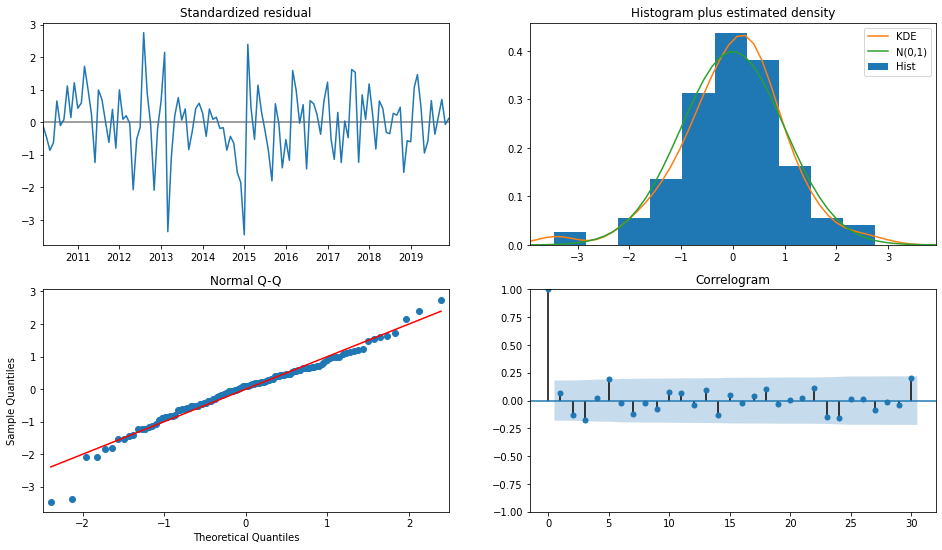

In [22]:
fig = plt.figure(figsize=(16, 9))
fig = res.plot_diagnostics(fig=fig, lags=30)

In [23]:
lbox(res.resid)

,lb_stat,lb_pvalue
1,0.541624,0.461761
2,2.501412,0.286303
3,6.215648,0.101577
4,6.305813,0.177444
5,10.874410,0.053928
6,10.912962,0.091104
7,12.773382,0.077826
8,12.816943,0.118305
9,13.511992,0.140774
10,14.324709,0.158689


This also seems somewhat reasonable.

Finally, we try M2 Change.

In [24]:
m2 = (edata.WM2NS).dropna()

m2change = m2.diff().dropna()


mod = AutoReg(m2change , 1)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                  WM2NS   No. Observations:                  521
Model:                     AutoReg(1)   Log Likelihood               -2866.654
Method:               Conditional MLE   S.D. of innovations             59.971
Date:                Fri, 25 Mar 2022   AIC                           5739.308
Time:                        05:25:13   BIC                           5752.069
Sample:                    01-18-2010   HQIC                          5744.307
                         - 12-30-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9978      2.694      5.196      0.000       8.718      19.278
WM2NS.L1      -0.0432      0.044     -0.987      0.324      -0.129       0.043
                                    Roots           

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


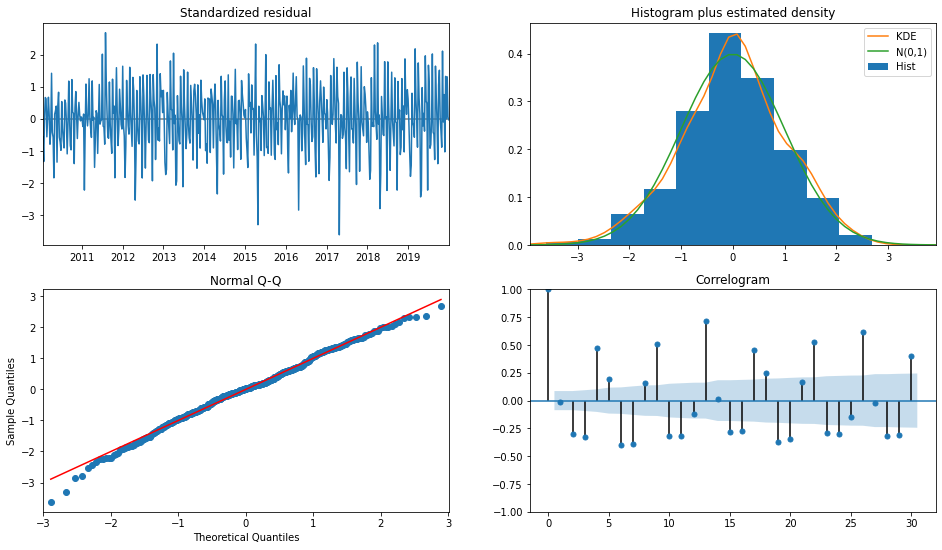

In [25]:
fig = plt.figure(figsize=(16, 9))
fig = res.plot_diagnostics(fig=fig, lags=30)

In [26]:
lbox(res.resid)

,lb_stat,lb_pvalue
1,0.092851,7.605832e-01
2,48.298248,3.252136e-11
3,104.498533,1.675039e-22
4,221.153529,1.058510e-46
5,240.468130,6.092856e-50
6,323.633509,7.018769e-67
7,404.182703,3.023523e-83
8,417.434174,3.484181e-85
9,555.388676,7.784130e-114
10,608.074716,3.277042e-124


For this exampe, AR(1) doesn't cut it.   

## AR(p)


A generaliztion of AR(1) is AR(p) where of course $p \geq 1$


The form is:

$$X_t = \phi_0 + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \cdots \phi_p X_{t-p} + \epsilon_t $$


In this formulation, the stationary mean will be 

$$\mu = \frac{\phi_0}{1-(\phi_1 +\phi_2 + \cdots + \phi_p) }$$


The fit for this model can also be done via linear regression.  

Let's cook another fake set with $p =3$, solve it via linear regression and compare to the statsmodels' AutoReg

In [27]:
T = 1000
phi = np.array([.3,-.3,.5])
sigma= .2
mu = 10

phi0 = mu*(1 - np.sum(phi))

x0 = 15
x1 = 13
x2 = 11

x= np.zeros(T+1)

x[0:3] = np.array([x0,x1,x2])


epsilons = np.random.normal(size = T, scale = sigma)


for k in range(T-2):
    x[k+3] = phi0 + phi[0]* x[k+2] +  phi[1]* x[k+1] +  phi[2]* x[k] + epsilons[k]
    

X = np.ones([T-2,4])

X[:,1] = x[2:-1]
X[:,2] = x[1:-2]
X[:,3] = x[:-3]



y = x[3:]


bhat = np.linalg.pinv(X)@y


print("mu hat is ", bhat[0]/(1- bhat[1:].sum()))

print("bhat is ", bhat)

mu hat is  10.026521927580477
bhat is  [ 5.2984293   0.31906986 -0.34465472  0.49714347]


In [28]:

mod = AutoReg(x , 3)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 1001
Model:                     AutoReg(3)   Log Likelihood                 154.357
Method:               Conditional MLE   S.D. of innovations              0.207
Date:                Fri, 25 Mar 2022   AIC                           -298.714
Time:                        05:25:15   BIC                           -274.186
Sample:                             3   HQIC                          -289.391
                                 1001                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2984      0.338     15.665      0.000       4.636       5.961
y.L1           0.3191      0.026     12.414      0.000       0.269       0.369
y.L2          -0.3447      0.026    -13.202      0.0

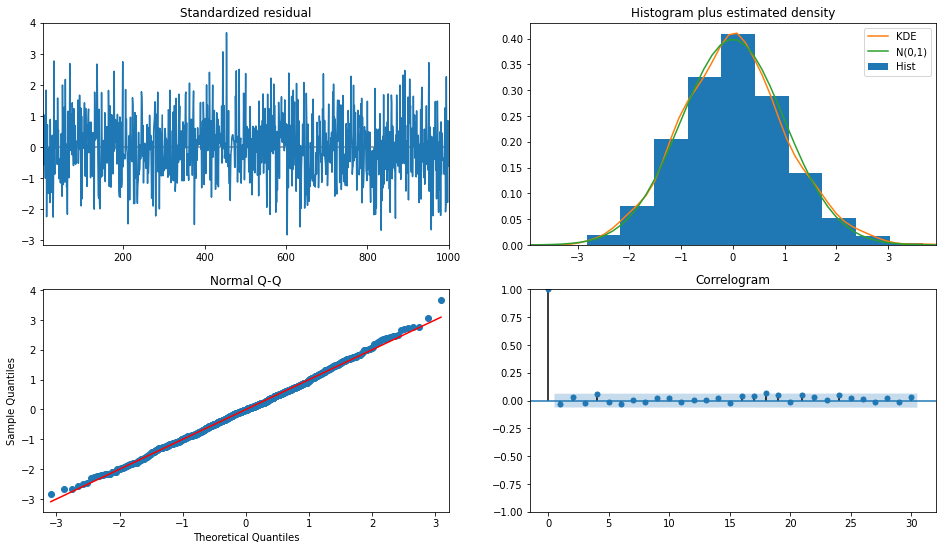

In [29]:
fig = plt.figure(figsize=(16, 9))
fig = res.plot_diagnostics(fig=fig, lags=30)

What happens if you mispecify $p$?  Let's try it.

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 1001
Model:                     AutoReg(1)   Log Likelihood                 -76.553
Method:               Conditional MLE   S.D. of innovations              0.261
Date:                Fri, 25 Mar 2022   AIC                            159.105
Time:                        05:25:17   BIC                            173.829
Sample:                             1   HQIC                           164.701
                                 1001                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7740      0.258     26.275      0.000       6.269       7.279
y.L1           0.3249      0.026     12.662      0.000       0.275       0.375
                                    Roots           

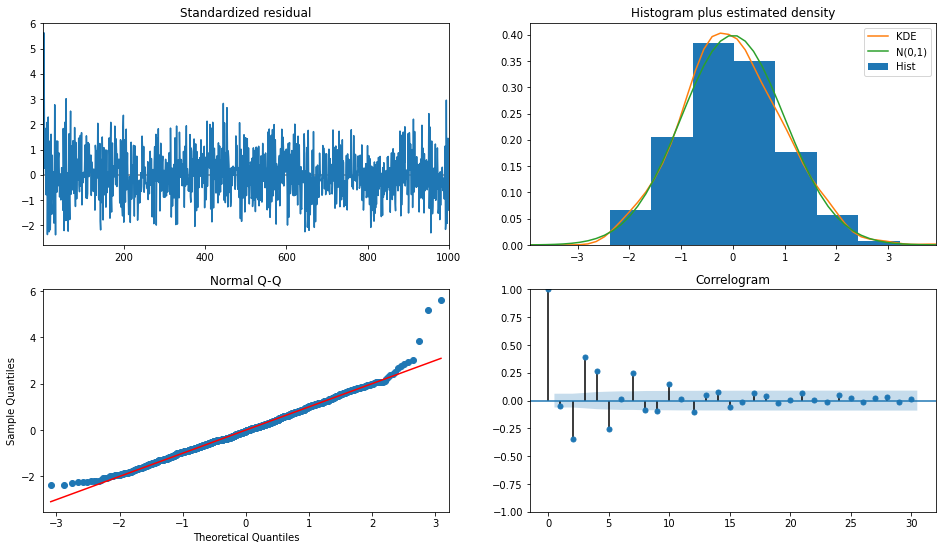

In [30]:
mod = AutoReg(x , 1)
res = mod.fit()
print(res.summary())
fig = plt.figure(figsize=(16, 9))
fig = res.plot_diagnostics(fig=fig, lags=30)
      
      

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 1001
Model:                     AutoReg(5)   Log Likelihood                 156.107
Method:               Conditional MLE   S.D. of innovations              0.207
Date:                Fri, 25 Mar 2022   AIC                           -298.213
Time:                        05:25:19   BIC                           -263.887
Sample:                             5   HQIC                          -285.165
                                 1001                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1229      0.412     12.422      0.000       4.315       5.931
y.L1           0.2943      0.032      9.303      0.000       0.232       0.356
y.L2          -0.3028      0.033     -9.201      0.0

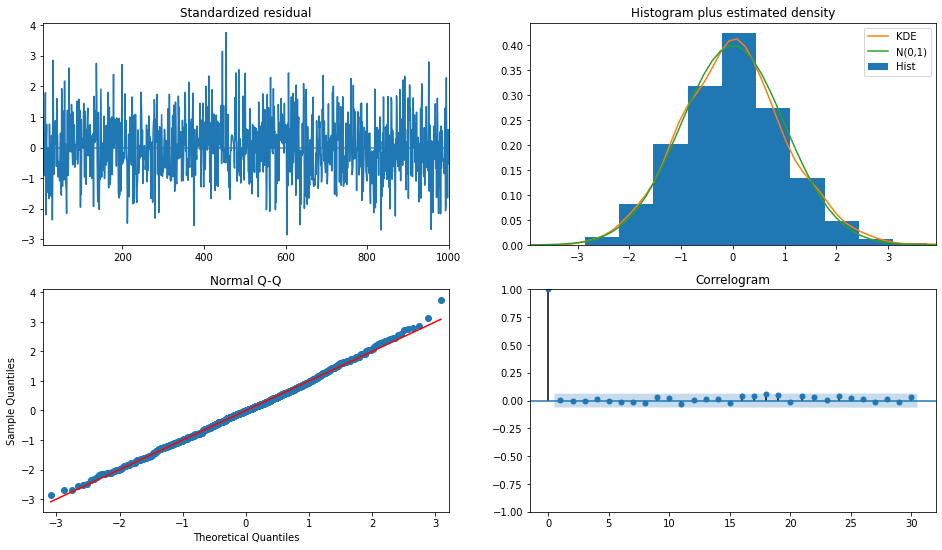

In [31]:
mod = AutoReg(x , 5)
res = mod.fit()
print(res.summary())
fig = plt.figure(figsize=(16, 9))
fig = res.plot_diagnostics(fig=fig, lags=30)

## Moving Average models

Another common clas of time-series models that are relatively simple are Moving Average models.

The concept is not that the previous values of $X_t$ are influencing the next element of the series, but rather the innovations themeselves (the innovations refer to the white noise terms). 

Imagine first the case where $X_t = \mu + \epsilon_t$

In this case, the series is just randome noise scattered about the mean $\mu$.  It will have no autocorrelation and  we might not even think of it as a time series.    

### MA(1)

In the MA(1) model, we change this to

$$X_t = \mu + \epsilon_t + \theta \epsilon_{t-1}$$


This means that the previous innovation "hangs around" a bit.  But the ones before that has no influence at all. 


We can do some staight-forward calculations to see that:

$$\mathrm{E}(X_t) = \mu$$

$$\mathrm{Var}(X_t) = \sigma^2_{\epsilon}(1 + \theta^2)$$


$$\mathrm{Cov}(X_t,X_{t-1}) = \mathrm{Cov}(\mu + \epsilon_t + \theta \epsilon_{t-1},\mu + \epsilon_{t-1} + \theta \epsilon_{t-2})\\
=\mathrm{Cov}(\epsilon_t, \epsilon_{t-1} + \theta \epsilon_{t-2}) + \mathrm{Cov}(\theta \epsilon_{t-1}, \epsilon_{t-1} + \theta \epsilon_{t-2})\\
= \theta \sigma_{\epsilon}^2$$


and for $j>1$

$$\mathrm{Cov}(X_t,X_{t-j})  = 0$$

Hence the ACF will be

$$\rho(h) = \begin{cases}\frac{\theta}{1+ \theta^2},& h = 1 \\ 0 ,& h>1\end{cases}$$





### MA(q)

This generalizes nicely to 

$$X_t = \mu + \epsilon_t + \theta_1 \epsilon_{t-1} +\theta_2 \epsilon_{t-2}+ \cdots + \theta_p \epsilon_{t-q} $$


We can get similar formulas as above (though they are messier).  The key thing to note is that  for MA(q), the ACF

$$\rho(h) = 0$$ whenever $h > q$.  


This is different that AR(p) where the ACF does not technically ever hit zero. 

A side conclusion is that if we see the ACF go to zero after $q$ lags, it suggests that MA(q) *might* be appropriate.




### Estimation of MA(q)

The general approach is to perform MLE or something like it.  However, it does not reduce to a simple linear regression - unlike the AR(p) case.  This is because we cannot directly observe the values $\epsilon_t$.  Fortunately, statistical software can do this numerically.  Let's generate some fake data a fit it using statsmodels.

We will do MA(2) with 


$\mu = 5$
$\sigma_{\epsilon} = 1$
$\theta_1 = .7$
$\theta_2 = .4$


We will define White Noise back to the index $-2$



In [32]:
T = 1000
mu = 5
sigma = 1
theta1 = .7
theta2 = .5

x = np.zeros(T)

epsilons = np.random.normal(size = T+2, scale = sigma)

x = mu + epsilons[2:] + theta1*epsilons[1:-1] +  theta2*epsilons[:-2]


Before we fit, lets look at the ACF.

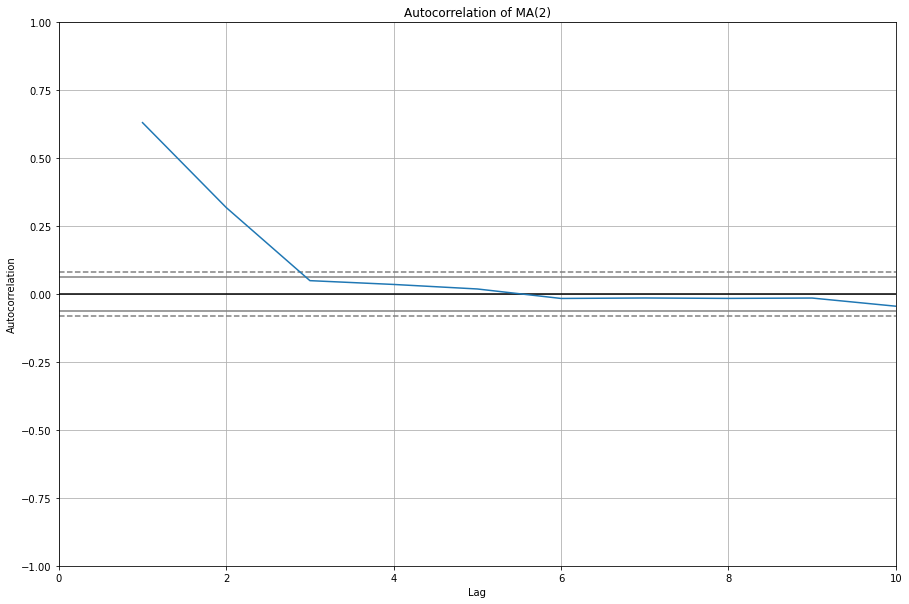

In [33]:
plt.figure(figsize = (15,10))

ma = pd.plotting.autocorrelation_plot(x)
 
# plotting the Curve
ma.plot()

plt.xlim(0,10)

plt.title("Autocorrelation of MA(2)")
 
# Display
plt.show()

Now let's use the software to fit

In [34]:
from statsmodels.tsa.arima.model import ARIMA


ma_mod = ARIMA(x, order=(0, 0, 2))
ma_res = ma_mod.fit()

print(ma_res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1402.830
Date:                Fri, 25 Mar 2022   AIC                           2813.661
Time:                        05:25:22   BIC                           2833.292
Sample:                             0   HQIC                          2821.122
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9657      0.070     71.070      0.000       4.829       5.103
ma.L1          0.7272      0.027     27.152      0.000       0.675       0.780
ma.L2          0.5170      0.027     19.235      0.0

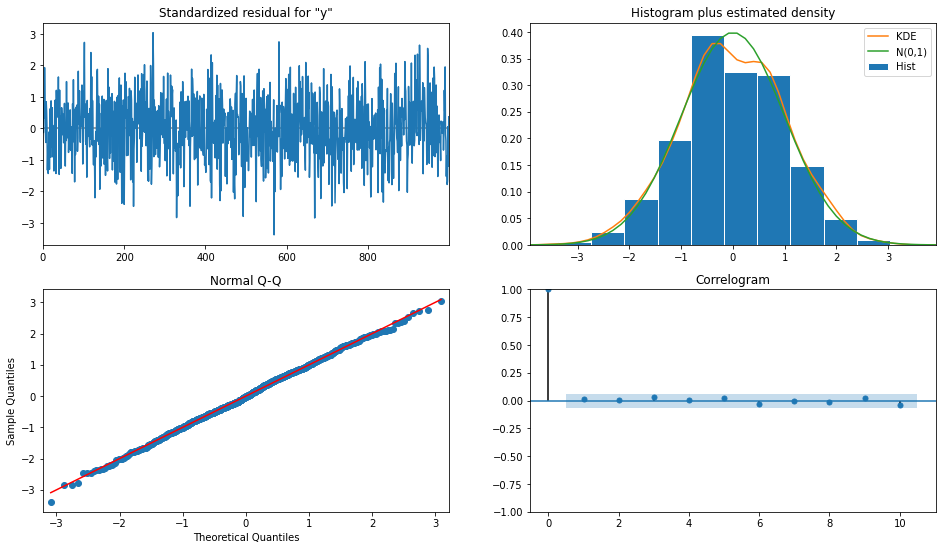

In [35]:
fig = plt.figure(figsize=(16, 9))
fig = ma_res.plot_diagnostics(fig=fig, lags=10)

## ARMA(p,q)

Natuarlly, these kinds of models can be mixed together, and are called ARMA(p,q)

The specification is

$$X_t = \phi_0 + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \cdots \phi_p X_{t-p} + \epsilon_t + \theta_1 \epsilon_{t-1} +\theta_2 \epsilon_{t-2}+ \cdots + \theta_p \epsilon_{t-q}  $$

As before, we will need software to fit.

### Order selection

Of course, the obvious question that is priot to fitting is, "What should $p$ and $q$ be?".

In some cases, you may have domain knowledge that guides your choice.  But in others, one can choose the model order using AIC or BIC.   And fortunately, there is software to do that for you. Lete make a fake data set with $p =2$ and $q= 1$ and fit with software.


We will just specify $x_0$ and $x_1$



In [36]:
T = 1000
sigma =1
mu = 10
phi1 = .5
phi2 = .2
phi0 = mu*(1-phi1 -phi2)

theta = .7

epsilons = np.random.normal(size = T, scale =sigma)

x = np.ones(T)

x[0] = 11
x[1] = 9


for k in np.arange(2,T):
    
    x[k] = phi0 + phi1*x[k-1] + phi2*x[k-2] + epsilons[k] + theta*epsilons[k-1] 
    
    




In [37]:
import statsmodels.api as sm

res = sm.tsa.arma_order_select_ic(x, ic=["aic", "bic"])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [38]:
res.aic_min_order, res.bic_min_order

((2, 1), (2, 1))

Let's circle back and try this with M2 Change

In [39]:
res = sm.tsa.arma_order_select_ic(m2change, ic=["aic", "bic"])


res.aic_min_order, res.bic_min_order


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

((4, 2), (4, 2))

## Exercise

Grab some some time series of your favorite stock.  See if you can model log-return and dialy volume.







